# Learning representations learning with Autoencoders : using constraints on the hidden representations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

%matplotlib inline

## Interesting link on optimization routines : [here](https://github.com/bentrevett/a-tour-of-pytorch-optimizers/blob/main/a-tour-of-pytorch-optimizers.ipynb)

## Loading MNIST

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [3]:
# to be modified if not on colab
root_dir = './data/MNIST/'
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root_dir, train=True, download=True, transform=transforms.ToTensor()),
    batch_size=256, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root_dir, train=False, download=True, transform=transforms.ToTensor()),
    batch_size=10, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST\raw



## Useful Functions

To plot for a few samples, the raw data, the recontructed data, and the hidden representation

In [4]:
def to_img(x):
    x = x.cpu().data.numpy()
    x = 0.5 * (x + 1)
    x = np.clip(x, 0, 1)
    x = x.reshape([-1, 28, 28])
    return x

def plot_reconstructions(model, x=-1, y=4):
    """
    Plot 10 reconstructions from the test set. The top row is the original
    digits, the bottom is the decoder reconstruction.
    The middle row is the encoded vector.
    The encoder is called by model.encoder
    The decoder is called by model.decoder
    """
    # encode then decode
    data, _ = next(iter(test_loader))
    data = data.view([-1, 784])
    data.requires_grad = False
    data = data.to(device)
    true_imgs = data
    encoded_imgs = model.encoder(data)
    decoded_imgs = model.decoder(encoded_imgs)

    true_imgs = to_img(true_imgs)
    decoded_imgs = to_img(decoded_imgs)
    encoded_imgs = encoded_imgs.cpu().data.numpy()

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(true_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(x,y))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## Simple Auto-Encoder with MSE loss

We start with the simplest autoencoder: a single, fully-connected layer as the encoder and decoder, trained with MSE loss.

* Define a simple Autoencoder with one hidden layer
* Train it on mnist: Use MSE Loss and Adam optimizer (See the documentation for [Adam optimizer](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam).)
* Plot input data, reconstruted data and hidden representations

In [9]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, encoding_dim) #modele a 1 seule couche cachée (encodeur 1 couche decodeur 1)
        self.decoder = nn.Linear(encoding_dim, input_dim)

    def forward(self, x):
        x = self.encoder(x)
        x = F.relu(x)
        x = self.decoder(x)
        

        return x

In [15]:
loss = nn.MSELoss()
input_dim= 784
encoding_dim= 32
ae = AutoEncoder(input_dim, encoding_dim).to(device)


optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)

ae


AutoEncoder(
  (encoder): Linear(in_features=784, out_features=32, bias=True)
  (decoder): Linear(in_features=32, out_features=784, bias=True)
)

Train Epoch: 0	Loss: 0.042244


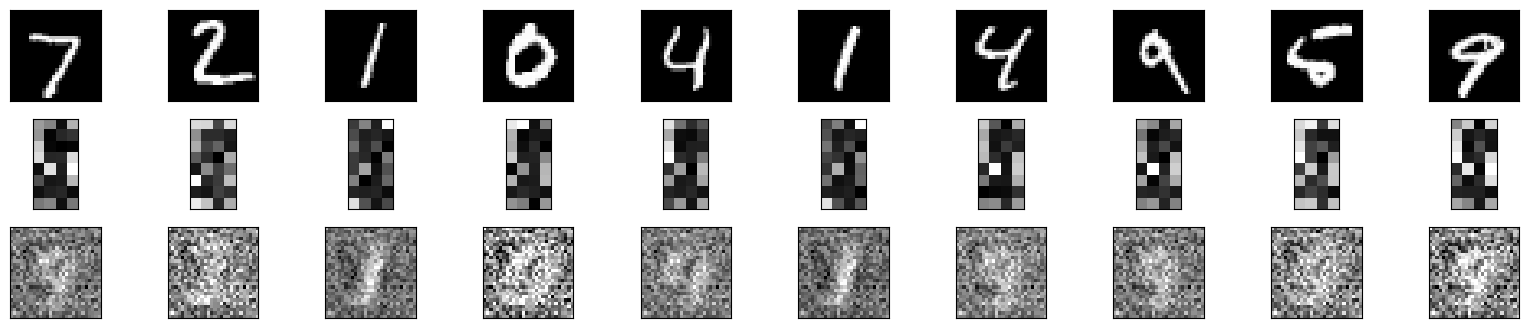

Train Epoch: 1	Loss: 0.034367
Train Epoch: 2	Loss: 0.030013
Train Epoch: 3	Loss: 0.026573
Train Epoch: 4	Loss: 0.027329
Train Epoch: 5	Loss: 0.025227
Train Epoch: 6	Loss: 0.025656
Train Epoch: 7	Loss: 0.027278
Train Epoch: 8	Loss: 0.025408
Train Epoch: 9	Loss: 0.026303
Train Epoch: 10	Loss: 0.024988


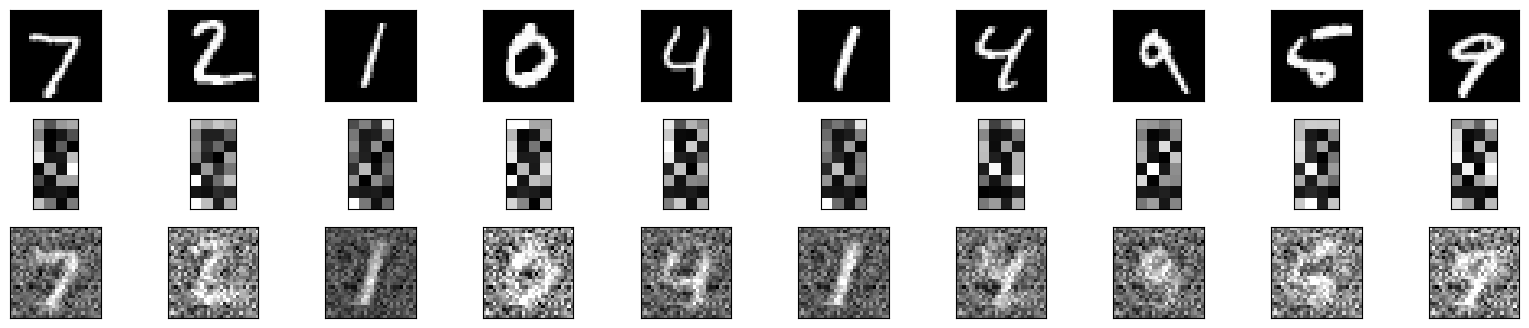

Train Epoch: 11	Loss: 0.025761
Train Epoch: 12	Loss: 0.024919
Train Epoch: 13	Loss: 0.024055
Train Epoch: 14	Loss: 0.024965
Train Epoch: 15	Loss: 0.025736
Train Epoch: 16	Loss: 0.022893
Train Epoch: 17	Loss: 0.023721
Train Epoch: 18	Loss: 0.024032
Train Epoch: 19	Loss: 0.025527
Train Epoch: 20	Loss: 0.024595


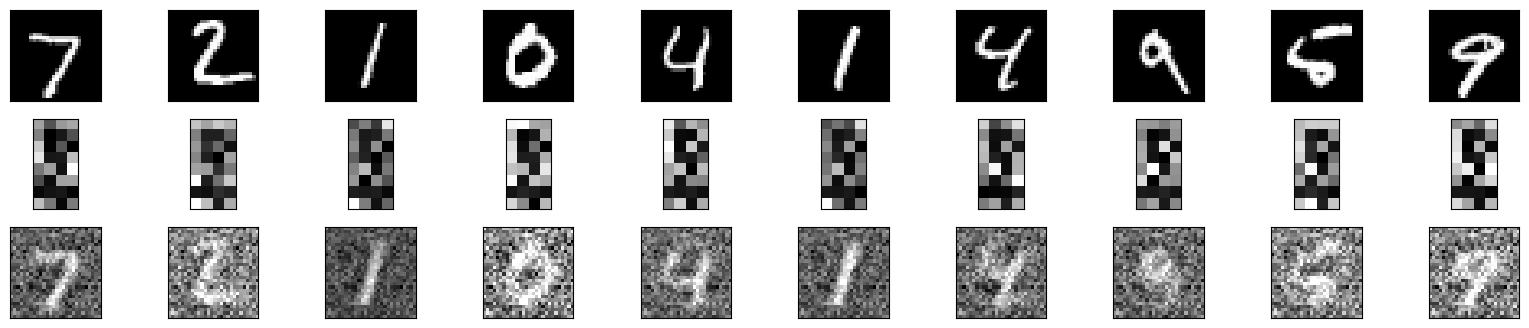

Train Epoch: 21	Loss: 0.024325
Train Epoch: 22	Loss: 0.025484
Train Epoch: 23	Loss: 0.025145
Train Epoch: 24	Loss: 0.025339
Train Epoch: 25	Loss: 0.025773
Train Epoch: 26	Loss: 0.026960
Train Epoch: 27	Loss: 0.025716
Train Epoch: 28	Loss: 0.023763
Train Epoch: 29	Loss: 0.024429
Train Epoch: 30	Loss: 0.022872


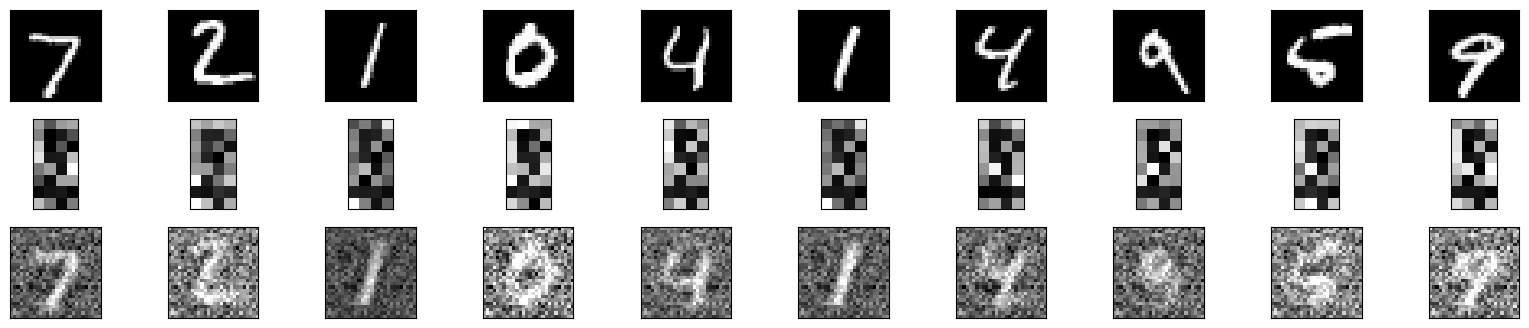

Train Epoch: 31	Loss: 0.023917
Train Epoch: 32	Loss: 0.023859
Train Epoch: 33	Loss: 0.024028
Train Epoch: 34	Loss: 0.025159
Train Epoch: 35	Loss: 0.024713
Train Epoch: 36	Loss: 0.024804
Train Epoch: 37	Loss: 0.024444
Train Epoch: 38	Loss: 0.023825
Train Epoch: 39	Loss: 0.025003
Train Epoch: 40	Loss: 0.026076


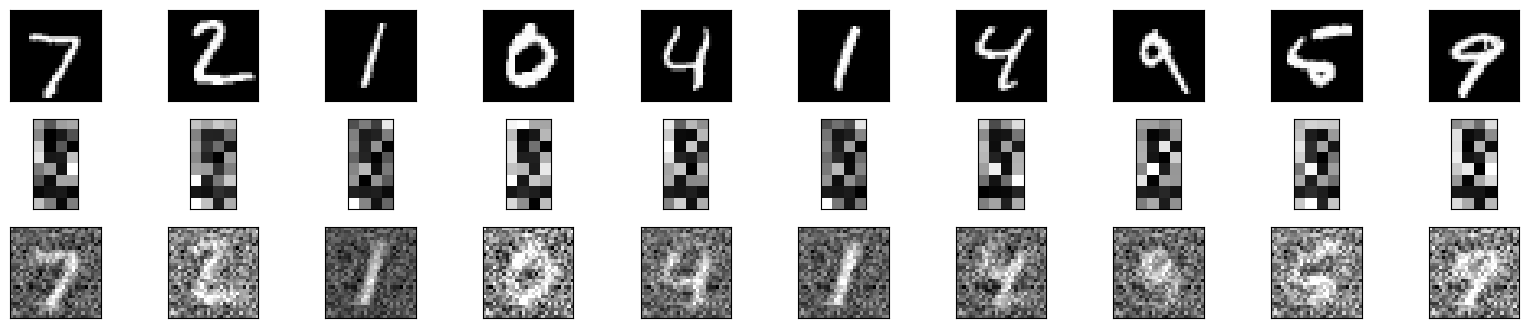

Train Epoch: 41	Loss: 0.022893
Train Epoch: 42	Loss: 0.024075
Train Epoch: 43	Loss: 0.022850
Train Epoch: 44	Loss: 0.022132
Train Epoch: 45	Loss: 0.024964
Train Epoch: 46	Loss: 0.025197
Train Epoch: 47	Loss: 0.024586
Train Epoch: 48	Loss: 0.025448
Train Epoch: 49	Loss: 0.025354
Train Epoch: 50	Loss: 0.026796


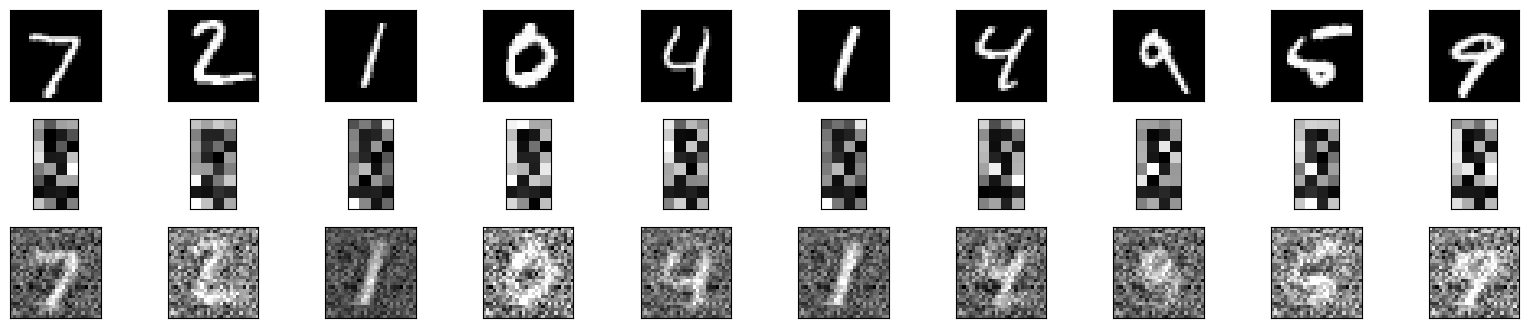

Train Epoch: 51	Loss: 0.025872
Train Epoch: 52	Loss: 0.024832
Train Epoch: 53	Loss: 0.025333
Train Epoch: 54	Loss: 0.025182
Train Epoch: 55	Loss: 0.024918
Train Epoch: 56	Loss: 0.024709
Train Epoch: 57	Loss: 0.024244
Train Epoch: 58	Loss: 0.024895
Train Epoch: 59	Loss: 0.025479
Train Epoch: 60	Loss: 0.026416


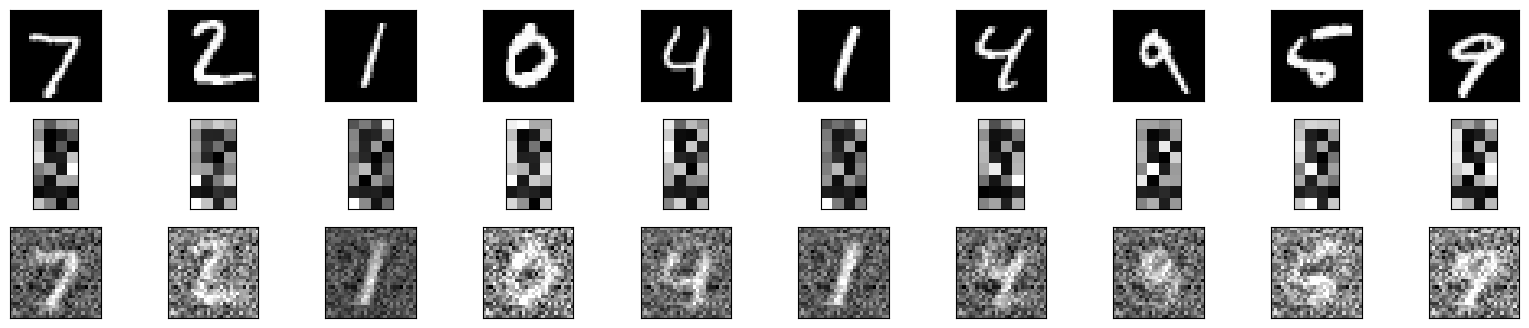

Train Epoch: 61	Loss: 0.022313
Train Epoch: 62	Loss: 0.025411
Train Epoch: 63	Loss: 0.023273


KeyboardInterrupt: 

In [16]:
def train_model(model,loss_fn,data_loader=None,epochs=1,optimizer=None):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.view([-1, 784])
            data = data.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, data)
            loss.backward()
            optimizer.step()
        print('Train Epoch: {}\tLoss: {:.6f}'.format(
            epoch, loss.data.item()))
        if epoch %5 == 0:
          plot_reconstructions(model)
    plot_reconstructions(model)

train_model(ae,loss_fn=loss,data_loader=train_loader,epochs=100,optimizer=optimizer)

## Using a constraint on the norm of the hidden representations

We modify the learnig of the above AE by adding a term to the objective function: the L1 norm (use *torch.norm(vector,1)*) of the hidden representations. Wde will use $C(W) = MSE(W)+ \lambda \sum_i |h_i|$ where $\lambda$ should be set by hand (cross validation) and $|h_i|$ stands for the L1 norm of the hidden representation of sample $x_i$.

Train the lodel with MSE Loss and Adam optimizer.


In [24]:
l1_regularization_loss = nn.L1Loss()

Train Epoch: 0	Loss: 0.017687	RegLoss: 0.000000


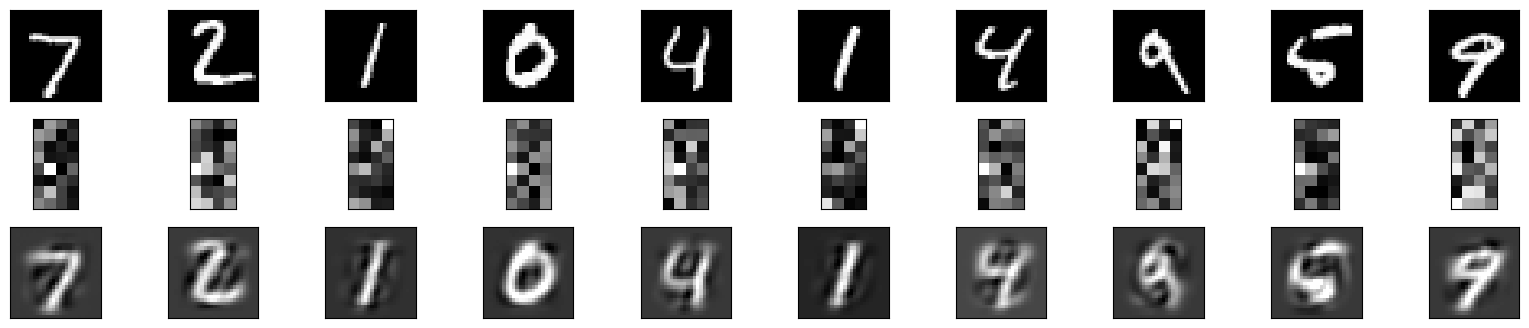

Train Epoch: 1	Loss: 0.016874	RegLoss: 0.000000
Train Epoch: 2	Loss: 0.017743	RegLoss: 0.000000
Train Epoch: 3	Loss: 0.017887	RegLoss: 0.000000
Train Epoch: 4	Loss: 0.017610	RegLoss: 0.000000
Train Epoch: 5	Loss: 0.018399	RegLoss: 0.000000


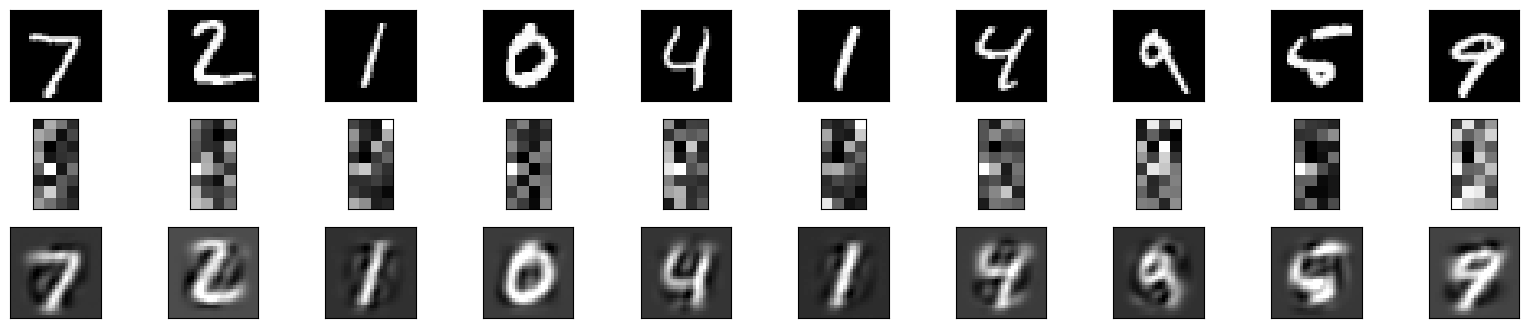

Train Epoch: 6	Loss: 0.018830	RegLoss: 0.000000
Train Epoch: 7	Loss: 0.018622	RegLoss: 0.000000
Train Epoch: 8	Loss: 0.019587	RegLoss: 0.000000
Train Epoch: 9	Loss: 0.018857	RegLoss: 0.000000


KeyboardInterrupt: 

In [34]:
def train_model_sparse(model,loss_fn, eta, data_loader=None,epochs=1,optimizer=None):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, _) in enumerate(train_loader):
           data=data.view([-1,784])
           data=data.to(device)
           optimizer.zero_grad()
           loss = loss_fn(model(data),data)+eta*torch.norm(model.encoder(data),1)
           l1_regularization_loss = eta*torch.norm(model.encoder(data),1)
           loss.backward()
           optimizer.step()   
           
        print('Train Epoch: {}\tLoss: {:.6f}\tRegLoss: {:.6f}'.format(
            epoch, loss.data.item(),l1_regularization_loss.data.item()))
        if epoch %5 == 0:
          plot_reconstructions(model)
    plot_reconstructions(model)

train_model_sparse(ae,loss_fn=loss,eta=0.00000000000000000000000001,data_loader=train_loader,epochs=100,optimizer=optimizer)

## Deeper Autoencoder

Now you will code an autoencoder where both the encoder and the decoder are multilayer perceptron (MLP). You can take for the encoder a first hidden layer with dimension 128, a second one with dimension 64 and then the code of dimension 32. These numbers should be parameters of the construction method. For the decoder, take the same sequence of dimensions in reverse order.

Create a DeepEncoder class then a DeepDecoder class and finally a DeepAutoEncoder class. Use *nn.ModuleList()* (see the doc [here](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html))

Train the model with MSE Loss and Adam optimizer.


In [63]:
class DeepEncoder(nn.Module):

    def __init__(self, input_dim, encoding_dim, hidden_dim):
        super(DeepEncoder, self).__init__()
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.hidden_dim = hidden_dim
        self.encoder = nn.ModuleList()
        current_dim = input_dim
        for h_dim in hidden_dim:
            self.encoder.append(nn.Linear(current_dim, h_dim))
            current_dim = h_dim
        self.encoder.append(nn.Linear(current_dim, encoding_dim))
    def forward(self, x):
        for layer in self.encoder:
            x = F.relu(layer(x))
          
            

        return x

In [80]:
class DeepDecoder(nn.Module):

    def __init__(self, input_dim, encoding_dim, hidden_dim):
        super(DeepDecoder, self).__init__()
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.hidden_dim = hidden_dim
        self.decoder = nn.ModuleList()
        current_dim = encoding_dim
        for h_dim in hidden_dim[::-1]:
            self.decoder.append(nn.Linear(current_dim, h_dim))
            current_dim = h_dim
        self.decoder.append(nn.Linear(current_dim, input_dim))

    def forward(self, x):
        for layer in self.decoder-1:
            x = F.relu(layer(x))   
        x = F.sigmoid(self.decoder[-1](x))
         
        return x

In [81]:
class DeepAutoEncoder(nn.Module):

    def __init__(self, input_dim, encoding_dim, hidden_dim):
        super(DeepAutoEncoder, self).__init__()
        self.encoder = DeepEncoder(input_dim, encoding_dim, hidden_dim)
        self.decoder = DeepDecoder(input_dim, encoding_dim, hidden_dim)

    def forward(self, x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

In [82]:
input_dim = 784
encoding_dim = 32
hidden_dim = [128, 64, 32]

dae = DeepAutoEncoder(input_dim, encoding_dim, hidden_dim).to(device)

dae

optimizer = torch.optim.Adam(dae.parameters(), lr=0.001)


In [83]:
train_model(dae,loss_fn=loss,data_loader=train_loader,epochs=10,optimizer=optimizer)
train_model_sparse(dae,loss_fn=loss,eta=0.000001,data_loader=train_loader,epochs=10,optimizer=optimizer)


TypeError: unsupported operand type(s) for -: 'ModuleList' and 'int'

## Relearn the DeepAutoEncoder using a `BCE Loss` for each pixel instead of the `MSELoss`.

In [ ]:
...

## Interpolating in the hidden (latent) space.


1.   Take two sample data $x_1$ and $x_2$
2.   Compute their latent reperesentations $z_1$ and $z_2$
3.   Build N intermediate representations between $z_1$ and $z_2$ by linear interpolation
4. Decode these intermediate $z$
5. Assume all the images are in an array Interpols with Interpols[0] is the decoging of $z_1$ and Interpols[N] is the decoging of $z_2$, plot all these decoded images using the cell below




## Denoising AE


Using previous code and with minimal modifications, you will transform your AE in a denoising AE, i.e. an autoencoder which takes as input a noisy image and that outputs the denoised image.

You first apply some noise to your input. You can add some random noise or erase some of the pixels, or use *random_binary* below.

### *Useful*

In [69]:
def random_binary(shape,rate): # rate = proba of 0
  A = torch.rand(shape).to(device)
  A[A>rate]=1.0
  A[A<rate]=0.0
  return A


In [70]:
random_binary((2,2),0.1)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')

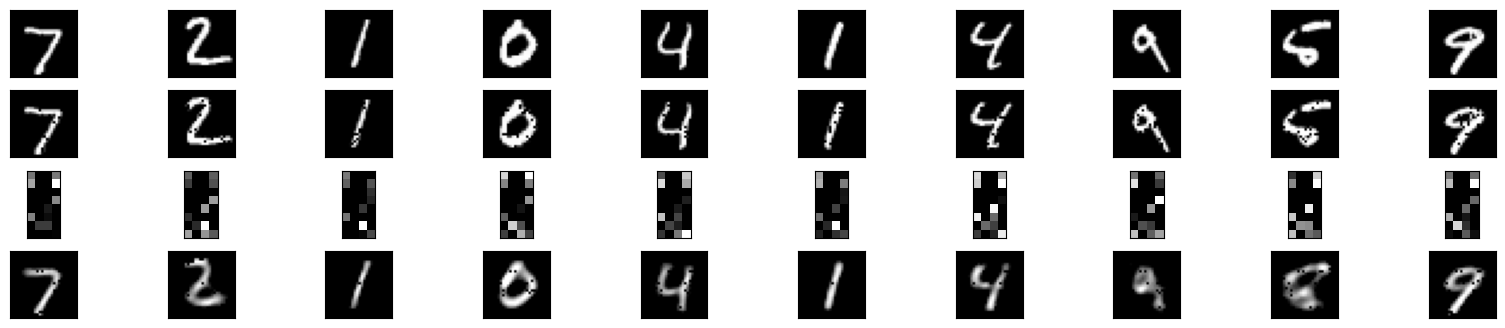

In [73]:
# Now you need to modify the plot function
def plot_denoising(model, noise=0.1):
    """
    Plot 10 reconstructions from the test set. The top row is the original
    digits, , the second row is the noisy digits,
    the third row is the encoded vector and
    the bottom is the decoder reconstruction.
    """
    # encode then decode
    data, _ = next(iter(test_loader))
    #
    # your code here to compute
    # noisy_data


    data = data.view([-1, 784]).to(device)
    noisy_data = data * random_binary (data.size(),noise)

    # encoded_imgs

    encoded_imgs = model.encoder(noisy_data)


    # decoded_imgs
    decoded_imgs = model.decoder(encoded_imgs)

    #
    true_imgs = to_img(data)
    noisy_imgs = to_img(noisy_data)
    decoded_imgs = to_img(decoded_imgs)
    encoded_imgs = encoded_imgs.cpu().data.numpy()

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(4, n, i + 1)
        plt.imshow(true_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display corrupted original
        ax = plt.subplot(4, n, i + 1 +n)
        plt.imshow(noisy_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display code
        ax = plt.subplot(4, n, i + 1 + 2*n)
        plt.imshow(encoded_imgs[i].reshape(-1,4))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(4, n, i + 1 +  3*n)
        plt.imshow(decoded_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

plot_denoising(dae, noise=0.1)

### Rewrite the train function

Apply binary noise on the fly to inputs. Use a parameter *noiselevel* for the rate parameter in the random_binary function above.

Train Epoch: 0	Loss: 0.025665


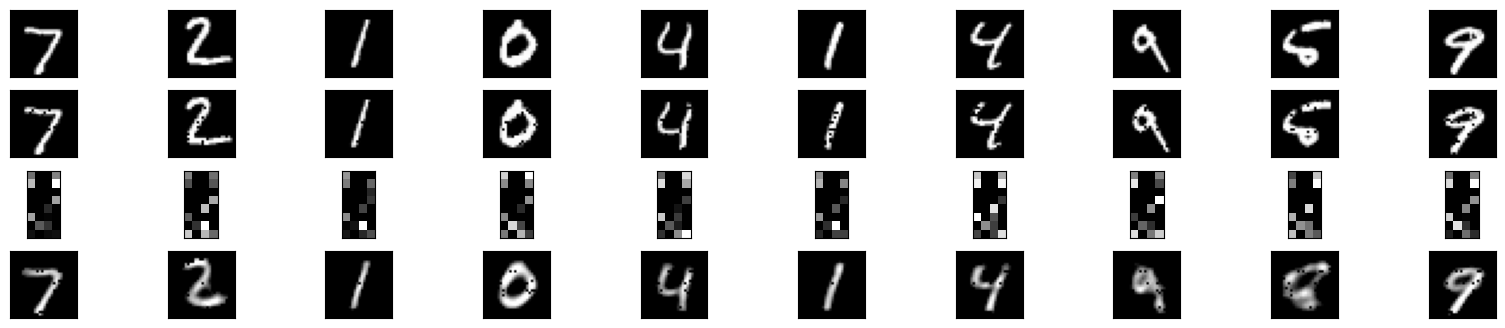

Train Epoch: 1	Loss: 0.025436
Train Epoch: 2	Loss: 0.023339
Train Epoch: 3	Loss: 0.023372
Train Epoch: 4	Loss: 0.023797
Train Epoch: 5	Loss: 0.024007
Train Epoch: 6	Loss: 0.024149
Train Epoch: 7	Loss: 0.023946
Train Epoch: 8	Loss: 0.020590
Train Epoch: 9	Loss: 0.021295
Train Epoch: 10	Loss: 0.020241


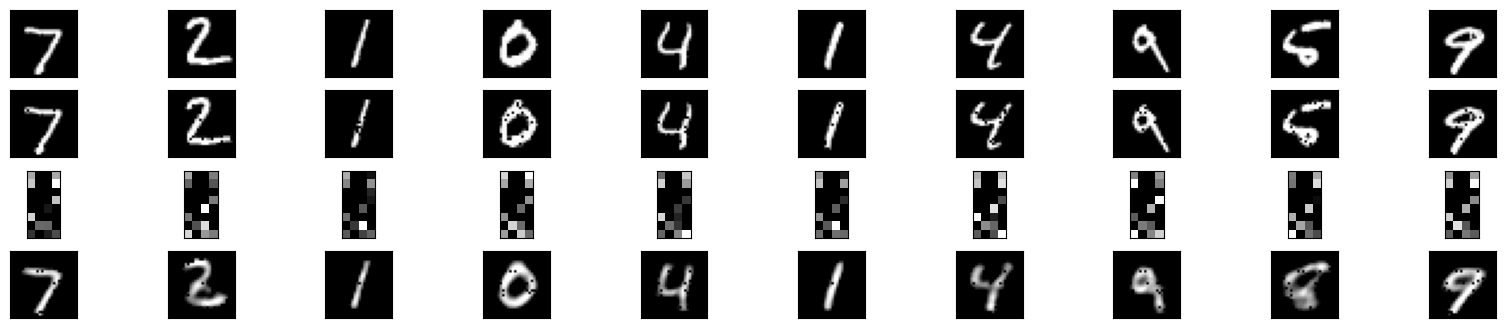

Train Epoch: 11	Loss: 0.022653
Train Epoch: 12	Loss: 0.023390
Train Epoch: 13	Loss: 0.024730
Train Epoch: 14	Loss: 0.023070
Train Epoch: 15	Loss: 0.021462
Train Epoch: 16	Loss: 0.021186
Train Epoch: 17	Loss: 0.022331
Train Epoch: 18	Loss: 0.022661
Train Epoch: 19	Loss: 0.022263
Train Epoch: 20	Loss: 0.020262


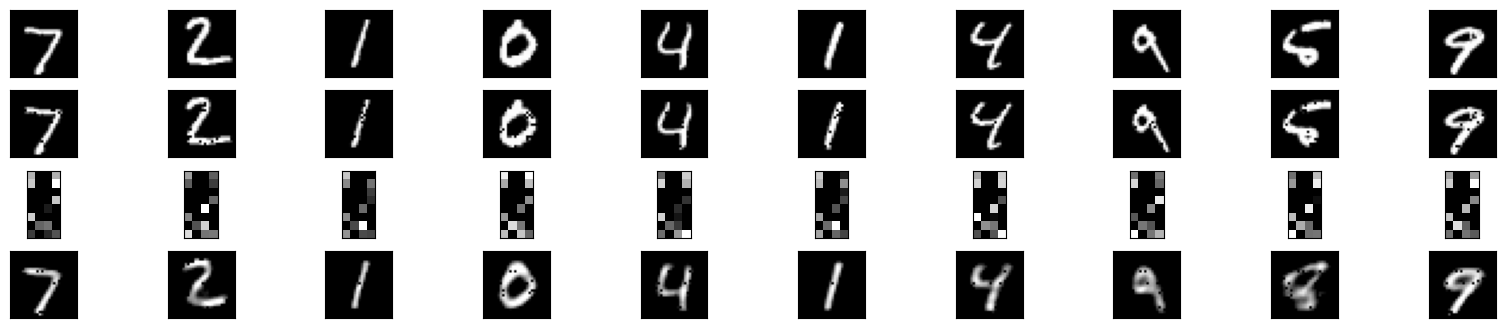

Train Epoch: 21	Loss: 0.019951
Train Epoch: 22	Loss: 0.021078
Train Epoch: 23	Loss: 0.020110
Train Epoch: 24	Loss: 0.020903
Train Epoch: 25	Loss: 0.020992
Train Epoch: 26	Loss: 0.020678
Train Epoch: 27	Loss: 0.021863
Train Epoch: 28	Loss: 0.020978
Train Epoch: 29	Loss: 0.021913
Train Epoch: 30	Loss: 0.020563


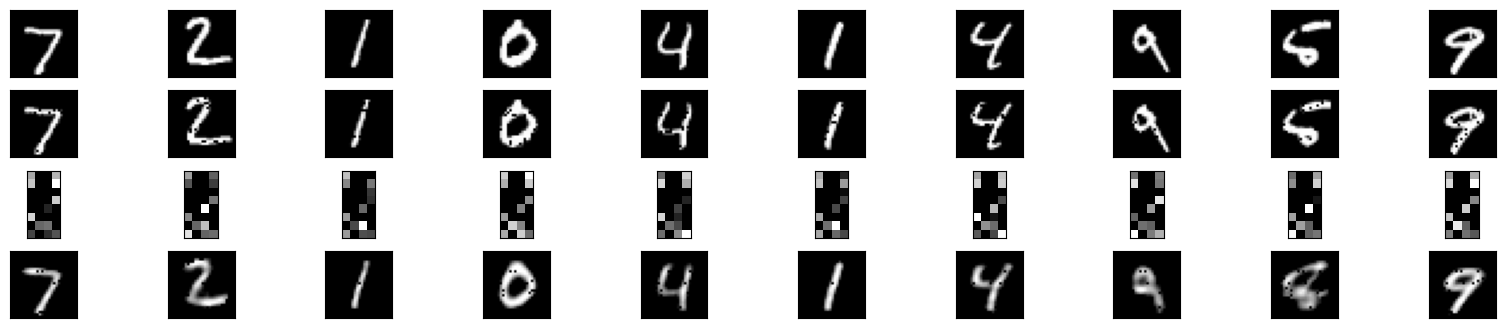

KeyboardInterrupt: 

In [75]:
# You need first to modify the training process by adding noise to your data
# Hint if you want to erase pixels: https://stackoverflow.com/questions/49216615/is-there-an-efficient-way-to-create-a-random-bit-mask-in-pytorch
def train_denoiser(model,loss_fn,data_loader=None,epochs=1,optimizer=None, noise=0.1):
    model.train()
    for epoch in range(epochs):
      for batch_idx, (data, _) in enumerate(train_loader):
        data = data.view([-1, 784])
        data = data.to(device)
        optimizer.zero_grad()
        noisy_data = data * random_binary (data.size(),noise)
        output = model(noisy_data)
        loss = loss_fn(output, data)
        loss.backward()
        optimizer.step()

      print('Train Epoch: {}\tLoss: {:.6f}'.format(
        epoch, loss.data.item()))
      if epoch %10 == 0:
        plot_denoising(model, noise)
    plot_denoising(model, noise)

train_denoiser(dae,loss_fn=loss,data_loader=train_loader,epochs=10,optimizer=optimizer, noise=0.1)


## Use convolutional AutoEncoders

You may use convolutional autoencoders. Define a convolutional Encoder and a convolutional Decoder using *Conv2d* layers in the encoder and *ConvTranspose2d* layers in the decoder ([see transposed convolution](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html)).

Rewrite the plot function and train the model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class DeepConvEncoder(nn.Module):
    def __init__(self, Tailles):
        super(DeepConvEncoder, self).__init__()


    def forward(self, x):

        return x

class DeepConvDecoder(nn.Module):
    def __init__(self, Tailles):
        super(DeepConvDecoder, self).__init__()


    def forward(self, x):

        return x

In [ ]:
# define the NN architecture
class DeepConvAutoEncoder(nn.Module):
    def __init__(self, Tailles = [16,4]):
        super(DeepConvAutoEncoder, self).__init__()
        self.Tailles = Tailles
        self.encoder = DeepConvEncoder(Tailles)
        self.decoder = DeepConvDecoder(Tailles)

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

